# Creme 0.5.0

Between the last notebook and this one, `creme` went from version 0.4.4 to 0.5.0.

Most importantly for us, the implementations of HST changed (see https://github.com/creme-ml/creme/issues/260).

We will rebenchmark HST on KDD and on SMTP, newly implemented in 0.5.0.

# HST benchmark

In [1]:
import creme
creme.__version__

'0.5.0'

In [1]:
from creme import datasets
from creme import anomaly
import time
from sklearn.metrics import roc_auc_score

counter = 0
hst = anomaly.HalfSpaceTrees(
    n_trees=25,
    tree_height=15,
    window_size=250,
    scale=True
)

y_true = []
y_pred = []
start_time = time.time()
for x, y in datasets.fetch_kdd99_http():
    if counter%10000 == 0:
        print(f"iteration: {counter}; time elapsed: {time.time()-start_time}")
    if counter > 250:
        y_true.append(y)
        y_pred.append(hst.score_one(x))
    hst.fit_one(x)
    counter += 1

iteration: 0; time elapsed: 0.005978822708129883
iteration: 10000; time elapsed: 35.25141882896423
iteration: 20000; time elapsed: 61.6821665763855
iteration: 30000; time elapsed: 88.61090230941772
iteration: 40000; time elapsed: 116.21094608306885
iteration: 50000; time elapsed: 143.12557005882263
iteration: 60000; time elapsed: 170.42622804641724
iteration: 70000; time elapsed: 196.24934244155884
iteration: 80000; time elapsed: 222.16394972801208
iteration: 90000; time elapsed: 4746.39901638031
iteration: 100000; time elapsed: 4779.200819015503
iteration: 110000; time elapsed: 4822.481929779053
iteration: 120000; time elapsed: 4872.236167669296
iteration: 130000; time elapsed: 4918.125526428223
iteration: 140000; time elapsed: 4968.412628173828
iteration: 150000; time elapsed: 5017.011113882065
iteration: 160000; time elapsed: 5061.195550918579
iteration: 170000; time elapsed: 5109.727809667587
iteration: 180000; time elapsed: 5161.444669485092
iteration: 190000; time elapsed: 5210.4

In [9]:
roc_auc_score(y_true, y_pred)

0.5045962217545684

In [ ]:
roc_auc_score(y_true, y_pred)

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

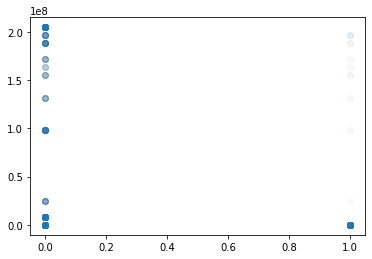

In [18]:
plt.scatter(y_true, y_pred, alpha=0.01)

In [22]:
import h5py
arrays = {}
f = h5py.File("http.mat")
for k,v in f.items():
    arrays[k] = np.array(v)

In [25]:
arrays["X"].shape

(3, 567498)

In [26]:
arrays["X"][0].shape

(567498,)

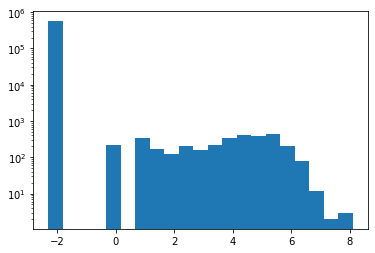

In [29]:
plt.hist(arrays["X"][0], bins='auto', log=True);

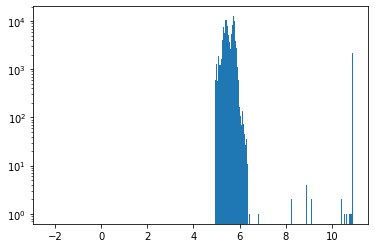

In [30]:
plt.hist(arrays["X"][1], bins='auto', log=True);

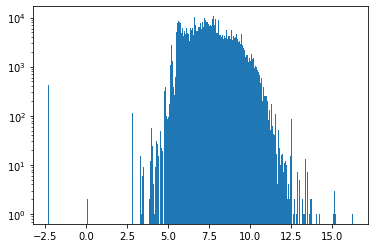

In [31]:
plt.hist(arrays["X"][2], bins='auto', log=True);

In [33]:
X0 = arrays["X"][0]
X1 = arrays["X"][1]
X2 = arrays["X"][2]
Y = arrays["y"]

In [34]:
colors = ["red", "blue"]

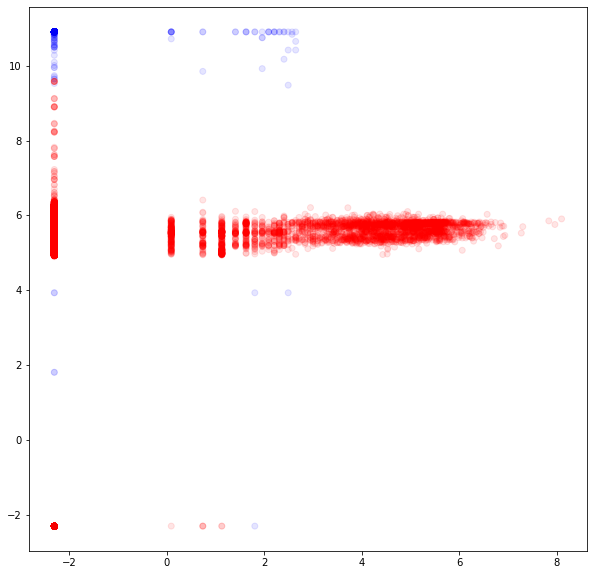

In [37]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X0, X1, c=Y, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.1)

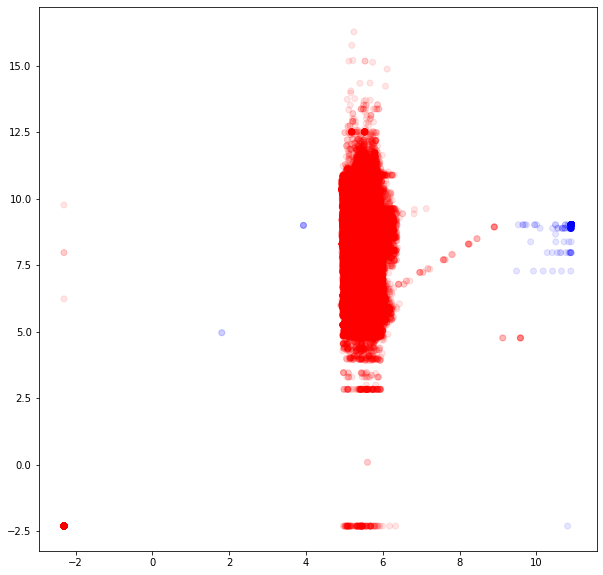

In [38]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X1, X2, c=Y, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.1)

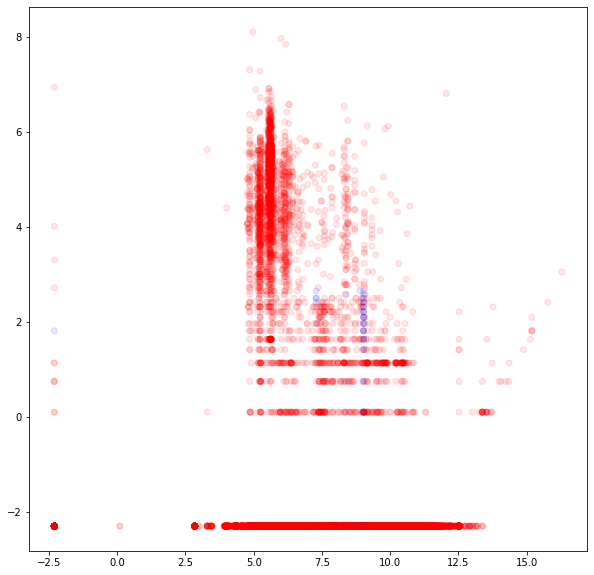

In [39]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X2, X0, c=Y, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.1)

# Isolation Forest
As a sanity check, we seek to verify the author's previous work on Isolation Forests. Reassuring, IForests are implemented in sklearn:

In [67]:
import pandas as pd

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [88]:
X = pd.DataFrame(arrays["X"]).T

In [89]:
y = pd.DataFrame(arrays["y"]).astype(int).T

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
clf = IsolationForest(
    n_estimators
)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
roc_auc_score(y_test, y_pred_test)

0.05707494446723921

Each of the columns has been transformed via $f(x) = \ln(x + 0.1)$. Out of curiosity, we'll undo that transformation and see how our model performs.

In [ ]:
clf = IsolationForest()
clf.fit(np.exp(X_train) - 0.1)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [64]:
roc_auc_score(y_test, y_pred_test)

0.5

In [81]:
kdd = pd.DataFrame()
# kdd[0] = [0,1,1]

In [82]:
kdd

""


In [85]:
_ = 0
for x,y in datasets.fetch_kdd99_http():
    if _%10000 == 0:
        print(_)
    kdd[_] = x.values()
    _ += 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000


KeyboardInterrupt: 

In [ ]:
kdd.T

In [86]:
X

,0,1,2
0,-2.302585,5.371103,10.716107
1,-2.302585,5.088213,8.418058
2,-2.302585,5.464255,7.113224
3,-2.302585,5.451468,7.616825
4,-2.302585,5.476882,6.186414
...,...,...,...
567493,-2.302585,5.357058,7.735477
567494,-2.302585,5.389528,5.464255
567495,-2.302585,5.384954,8.191491
567496,-2.302585,5.389528,7.118097


In [90]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
567493,0
567494,0
567495,0
567496,0


In [94]:
from creme import datasets
from creme import anomaly
from creme import stream
import time
from sklearn.metrics import roc_auc_score

counter = 0
hst = anomaly.HalfSpaceTrees(
    n_trees=25,
    tree_height=15,
    window_size=250,
    scale=True
)

y_true = []
y_pred = []
start_time = time.time()
for x, y in stream.iter_array(arrays["X"], arrays["y"]):
    if counter%10000 == 0:
        print(f"iteration: {counter}; time elapsed: {time.time()-start_time}")
    if counter > 250:
        y_true.append(y)
        y_pred.append(hst.score_one(x))
    hst.fit_one(x)
    counter += 1

iteration: 0; time elapsed: 0.21204161643981934


C:\Users\AzNsAnTaGiN\Anaconda3\lib\site-packages\creme\preprocessing\scale.py:14: RuntimeWarning: invalid value encountered in double_scalars
  return a / b


KeyboardInterrupt: 

# Benchmarking HST on SMTP

In [1]:
from creme import datasets
from creme import anomaly
import time
from sklearn.metrics import roc_auc_score

counter = 0
hst = anomaly.HalfSpaceTrees(
    n_trees=25,
    tree_height=15,
    window_size=250,
    scale=True
)

y_true = []
y_pred = []
start_time = time.time()
for x, y in datasets.fetch_kdd99_smtp():
    if counter%10000 == 0:
        print(f"iteration: {counter}; time elapsed: {time.time()-start_time}")
    if counter > 250:
        y_true.append(y)
        y_pred.append(hst.score_one(x))
    hst.fit_one(x)
    counter += 1

AttributeError: module 'creme.datasets' has no attribute 'fetch_kdd99_smtp'

In [ ]:
roc_auc_score(y_true, y_pred)